In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

data=pd.read_csv('input/train.csv')

In [33]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

In [17]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='spring')

,Age_band
1,346
0,277
2,188
3,69
4,11


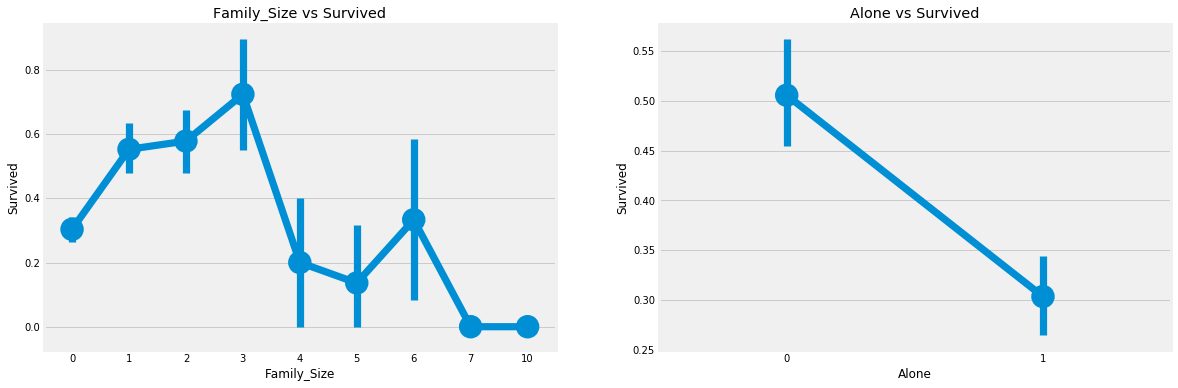

In [18]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(3)
plt.show()

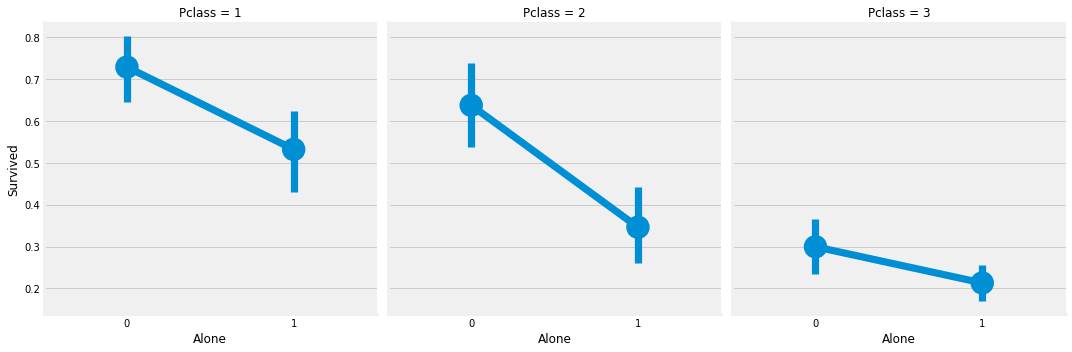

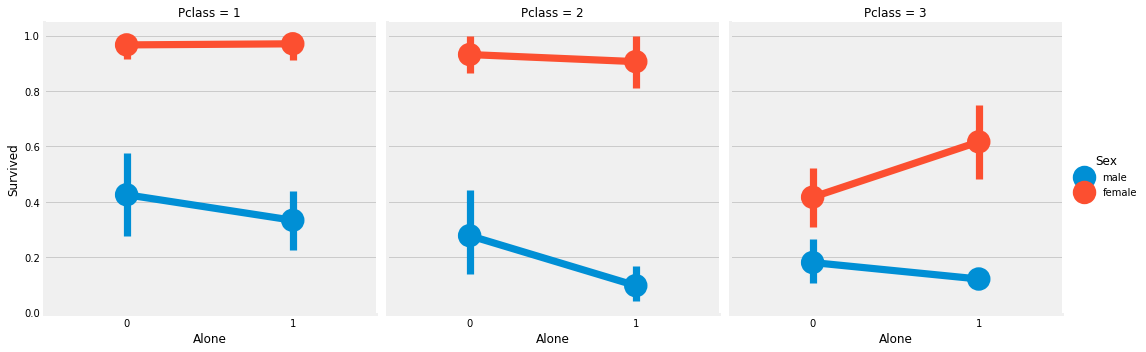

In [22]:
sns.factorplot('Alone','Survived',data=data,col='Pclass')
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

In [30]:
pd.crosstab([data.Embarked,data.Pclass,data.Sex],[data.Survived],margins=True).style.background_gradient(cmap='spring_r')

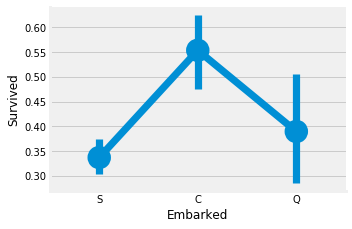

In [32]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

 아래는 핵심적인 표 메서드인 crosstab,groupby를 모아둔 것이다.

In [68]:
data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
#pd.crosstab(data.Initial,data.Sex).T
#data.groupby('Sex')['Age'].mean()
#pd.crosstab([data.Embarked,data.Pclass,data.Sex],[data.Survived],margins=True).T

Embarked      C                                   Q                          \
Pclass        1           2           3           1           2           3   
Sex      female male female male female male female male female male female   
Survived                                                                      
0             1   25      0    8      8   33      0    1      0    1      9   
1            42   17      7    2     15   10      1    0      2    0     24   
All          43   42      7   10     23   43      1    1      2    1     33   

Embarked           S                               All  
Pclass             1           2           3            
Sex      male female male female male female male       
Survived                                                
0          36      2   51      6   82     55  231  549  
1           3     46   28     61   15     33   34  340  
All        39     48   79     67   97     88  265  889

In [79]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

Dropping UnNeeded Features
Name--> We don't need name feature as it cannot be converted into any categorical value.

Age--> We have the Age_band feature, so no need of this.

Ticket--> It is any random string that cannot be categorised.

Fare--> We have the Fare_cat feature, so unneeded

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

Fare_Range--> We have the fare_cat feature.

PassengerId--> Cannot be categorised.

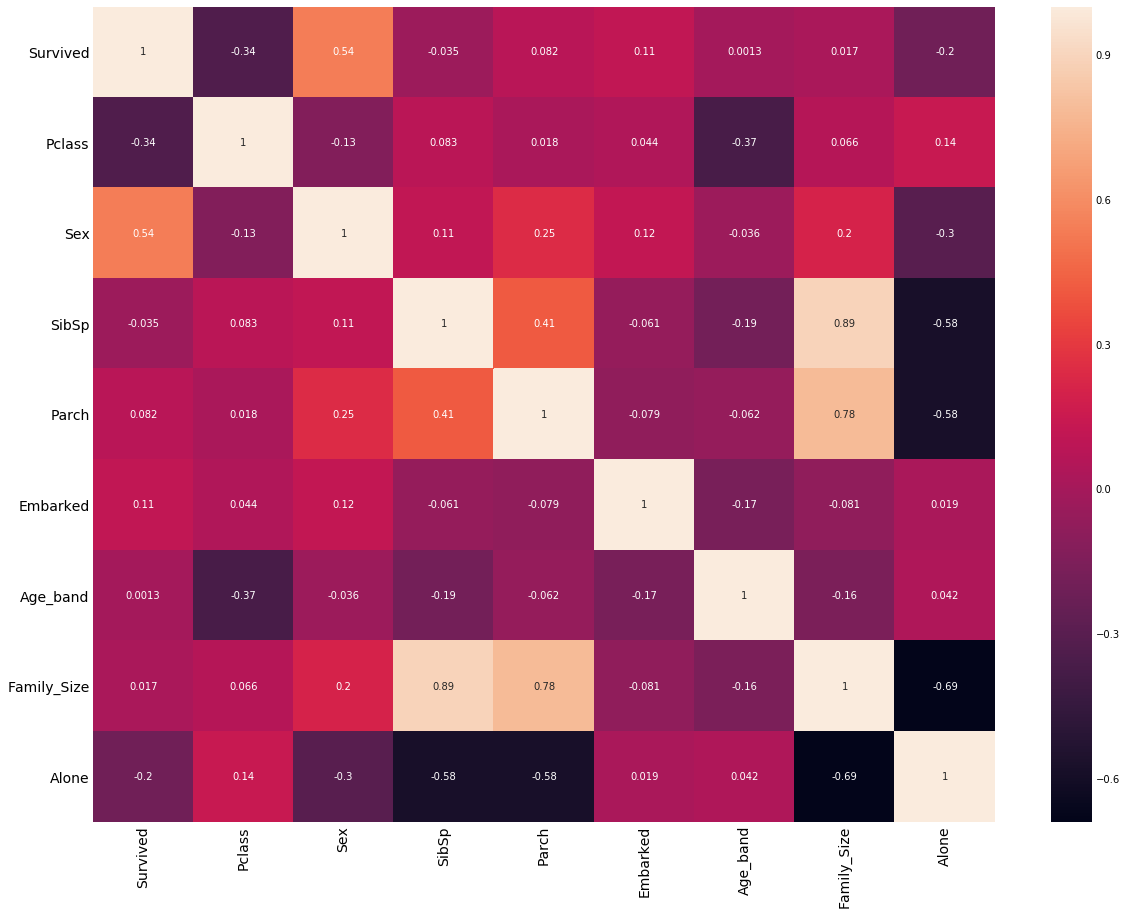

In [83]:
data.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### PT3 : Predictive Modeling